In [1]:
# Authors: Group 18
# Nhan Kiet To (1043668)
# Adam Thalhammer (972267)
# Will Walters (583639)

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
sns.set(style="ticks")

In [2]:
df = pd.read_csv(
    'experiments/TumourAngioSim-timeseries-table-2.csv',
    # index_col=['[run number]'],
    skiprows=6,
    usecols=[
        '[step]',
        '[run number]',
        'angiogenesis-signal-radius',
        'angiogenesis-min-demand',
        'count-malignant-cells',
        'count-somatic-cells',
        'count-vascular-patches'
    ]
)
df

,[run number],angiogenesis-signal-radius,angiogenesis-min-demand,[step],count-malignant-cells,count-somatic-cells,count-vascular-patches
0,1,1,1,0,8,492,783
1,8,1,1,0,12,488,783
2,1,1,1,1,8,503,783
3,9,1,1,0,10,490,783
4,10,1,1,0,17,483,783
...,...,...,...,...,...,...,...
603995,1999,4,5,297,1791,445,5092
603996,1999,4,5,298,1828,440,5148
603997,1999,4,5,299,1859,444,5176
603998,1999,4,5,300,1867,449,5211


In [3]:
pivot = df.melt([
    '[step]',   
    '[run number]',
    'angiogenesis-min-demand',
    'angiogenesis-signal-radius',
])
pivot

,[step],[run number],angiogenesis-min-demand,angiogenesis-signal-radius,variable,value
0,0,1,1,1,count-malignant-cells,8
1,0,8,1,1,count-malignant-cells,12
2,1,1,1,1,count-malignant-cells,8
3,0,9,1,1,count-malignant-cells,10
4,0,10,1,1,count-malignant-cells,17
...,...,...,...,...,...,...
1811995,297,1999,5,4,count-vascular-patches,5092
1811996,298,1999,5,4,count-vascular-patches,5148
1811997,299,1999,5,4,count-vascular-patches,5176
1811998,300,1999,5,4,count-vascular-patches,5211


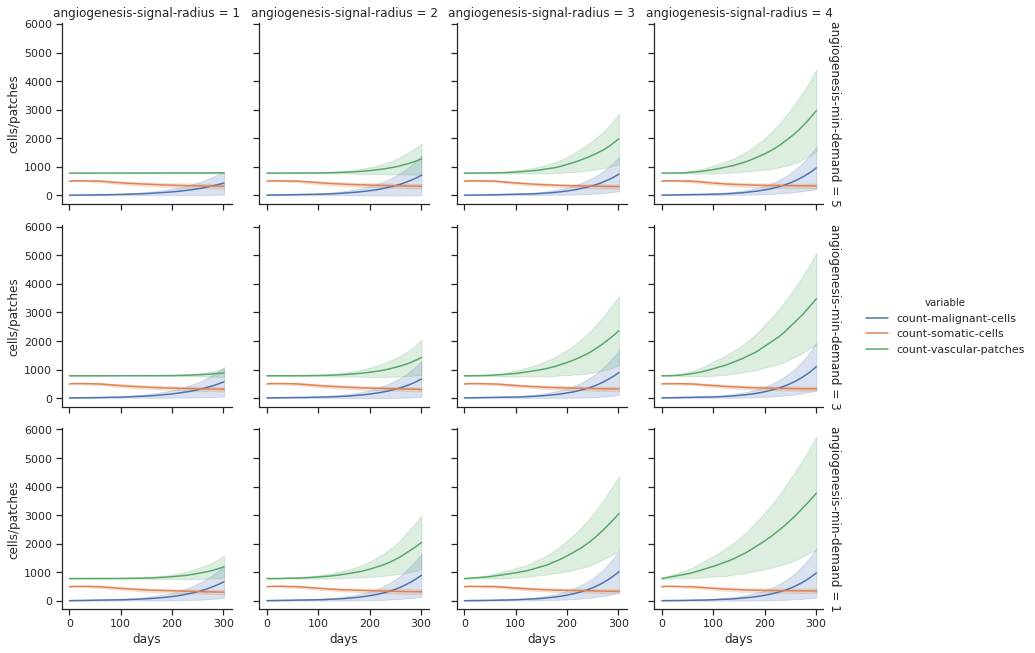

In [4]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': False})
g = sns.FacetGrid(pivot, row="angiogenesis-min-demand", col="angiogenesis-signal-radius", hue='variable', margin_titles=True, row_order=range(5, 0, -2))
g.map_dataframe(sns.lineplot, x="[step]", y="value", ci='sd')
g.set_axis_labels("days", "cells/patches")
g.add_legend()
plt.savefig("timeseries_angiogenesis_tumorigenesis.png", dpi=96, transparent=True, format='png', bbox_inches = "tight")